<a href="https://colab.research.google.com/github/FETIELOVE/MIW_ProjectIII/blob/main/VCLF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab Set up

In [24]:
!pip install -q scikit-learn matplotlib numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingClassifier






##Visualization

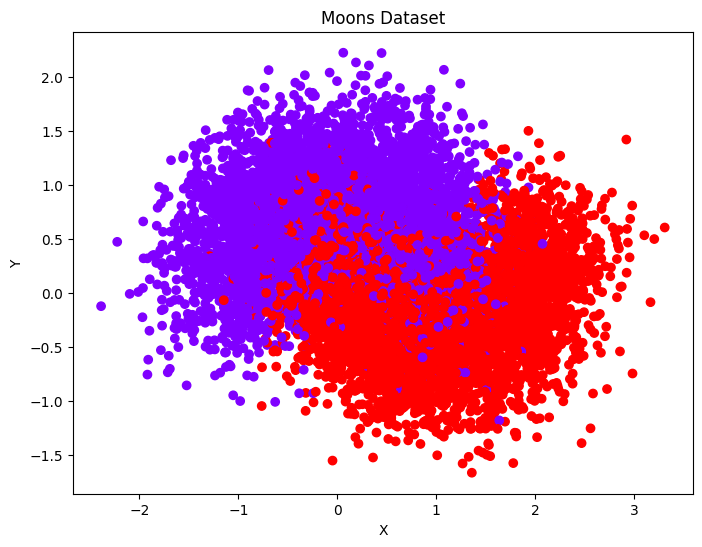

In [3]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Moons Dataset')
plt.show()

#Splitting

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 8000
Test set size: 2000


#Decision Tree Classifier

Depth: 3, Criterion: gini
Accuracy: 0.8630, Precision: 0.8438, Recall: 0.8865, F1: 0.8646


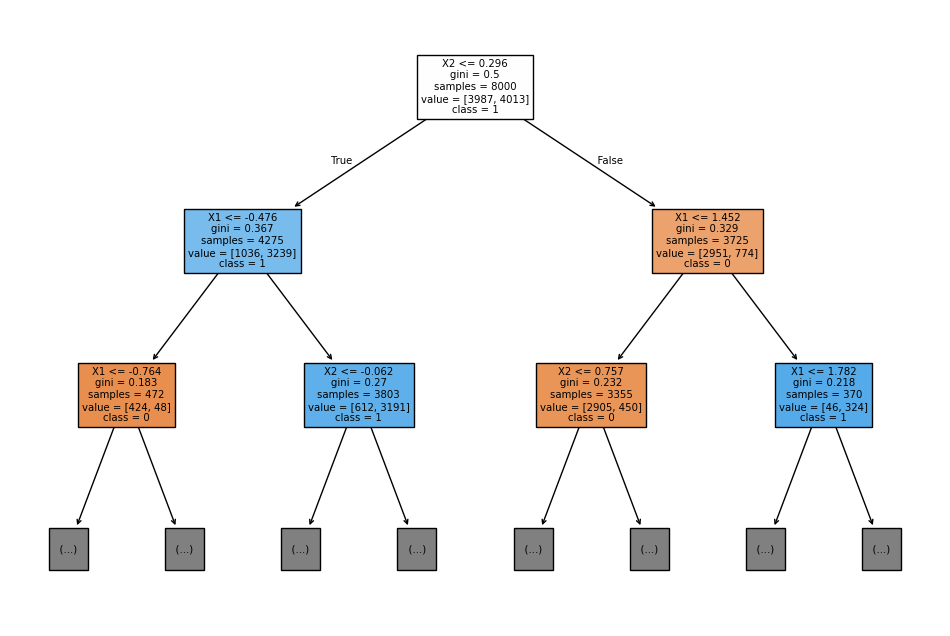

Depth: 5, Criterion: entropy
Accuracy: 0.8600, Precision: 0.8357, Recall: 0.8916, F1: 0.8627


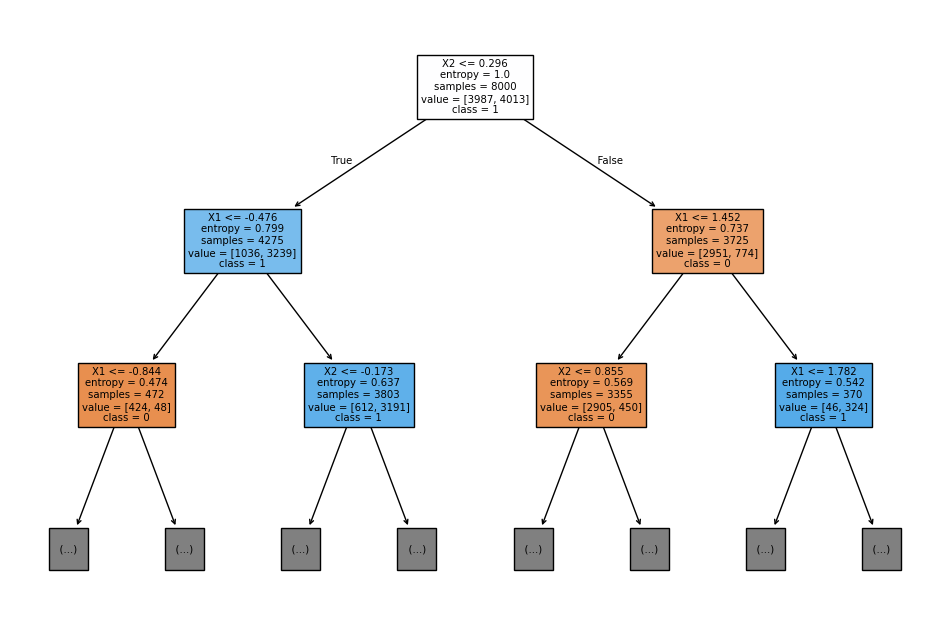

Depth: 10, Criterion: gini
Accuracy: 0.8510, Precision: 0.8563, Recall: 0.8389, F1: 0.8475


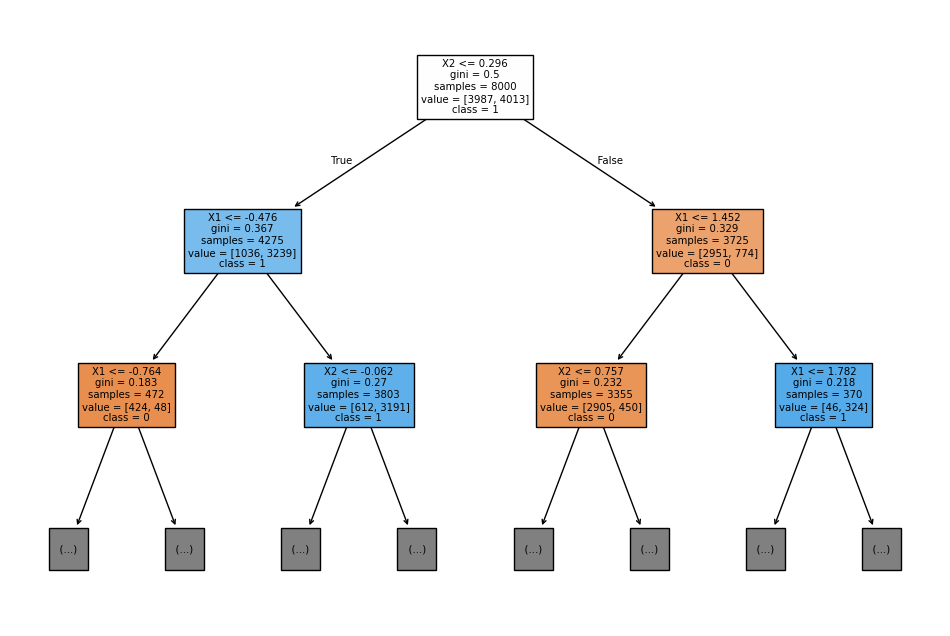

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, precision_score,
                            recall_score, f1_score)

def evaluate_tree(depth, criterion='gini'):
    tree = DecisionTreeClassifier(max_depth=depth, criterion=criterion,
                                  random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Depth: {depth}, Criterion: {criterion}")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

    # Plot tree
    plt.figure(figsize=(12, 8))
    plot_tree(tree, filled=True, feature_names=['X1', 'X2'],
              class_names=['0', '1'],max_depth=2)
    plt.show()

    return tree

# Evaluate different trees
tree1 = evaluate_tree(3, 'gini')
tree2 = evaluate_tree(5, 'entropy')
tree3 = evaluate_tree(10, 'gini')

#Random Forest

Estimators: 10, Max Depth: 5
Accuracy: 0.8660, Precision: 0.8613, Recall: 0.8683,  F1: 0.8648


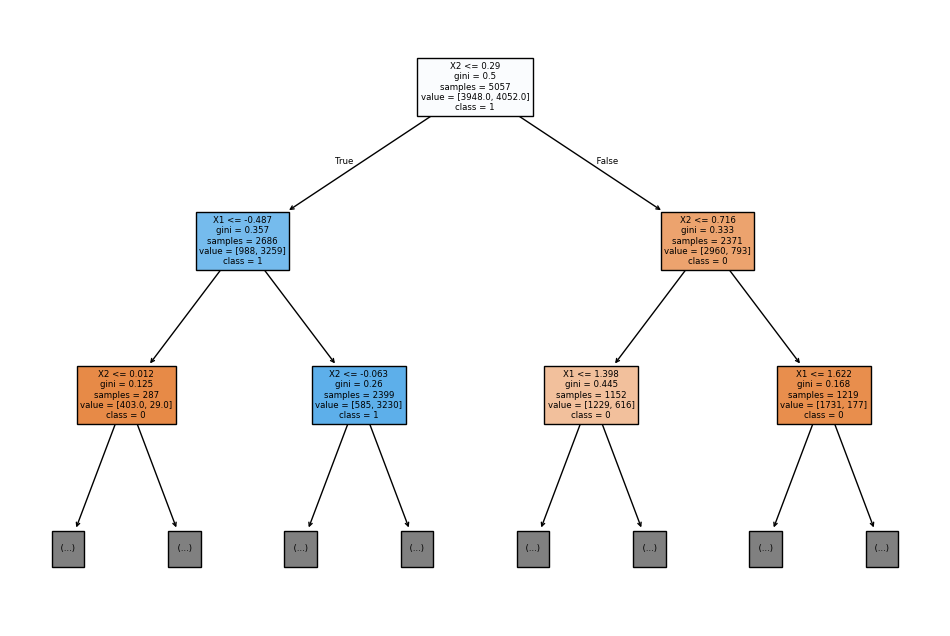

Estimators: 50, Max Depth: 10
Accuracy: 0.8685, Precision: 0.8642, Recall: 0.8703,  F1: 0.8672


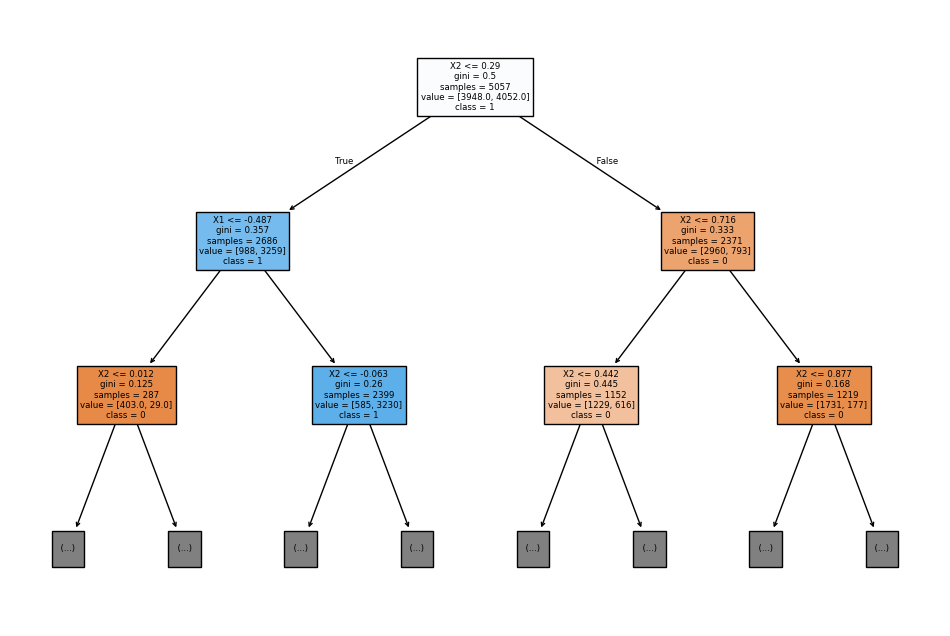

Estimators: 100, Max Depth: None
Accuracy: 0.8505, Precision: 0.8468, Recall: 0.8511,  F1: 0.8489


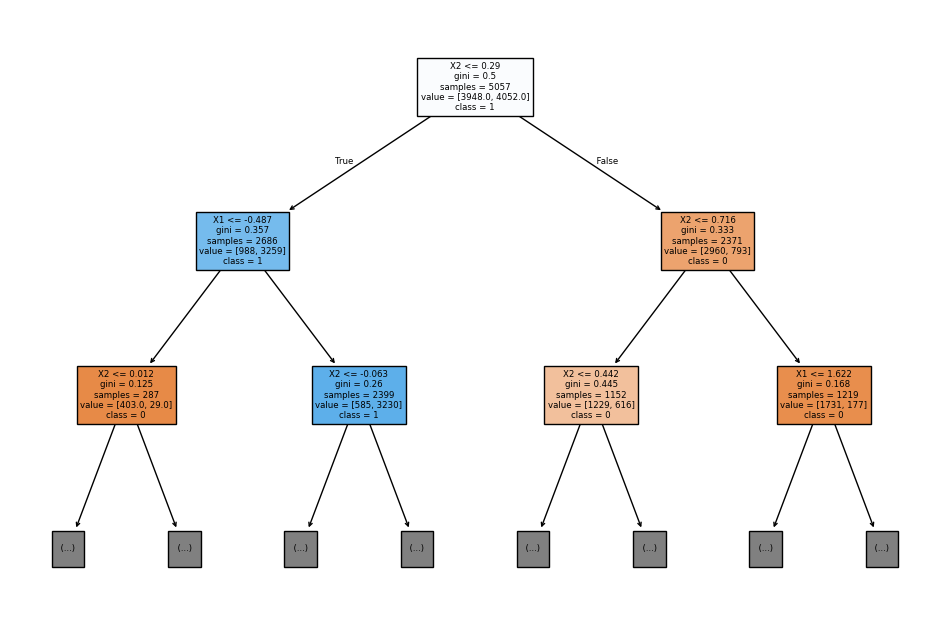

In [27]:

def evaluate_forest(n_estimators, depth):
    forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=depth,
                                    random_state=42)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Estimators: {n_estimators}, Max Depth: {depth}")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f},  F1: {f1:.4f}")

    # Plot one tree from the forest
    plt.figure(figsize=(12, 8))
    plot_tree(forest.estimators_[0], filled=True, feature_names=['X1', 'X2'],
              class_names=['0', '1'],max_depth=2)
    plt.show()

    return forest

# Evaluate different forests
forest1 = evaluate_forest(10, 5)
forest2 = evaluate_forest(50, 10)
forest3 = evaluate_forest(100, None)

#Logistic Regression&&SVM

Model: Logistic Regression
Accuracy: 0.8415, Precision: 0.8330, Recall: 0.8490, F1: 0.8409


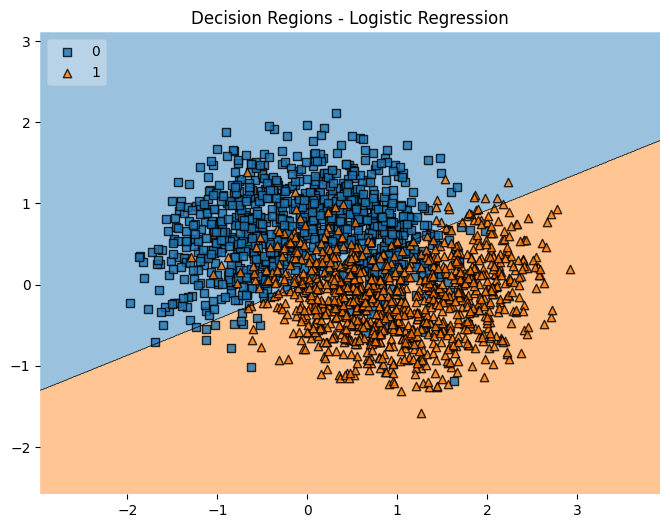

Model: SVM
Accuracy: 0.8705, Precision: 0.8633, Recall: 0.8764, F1: 0.8698


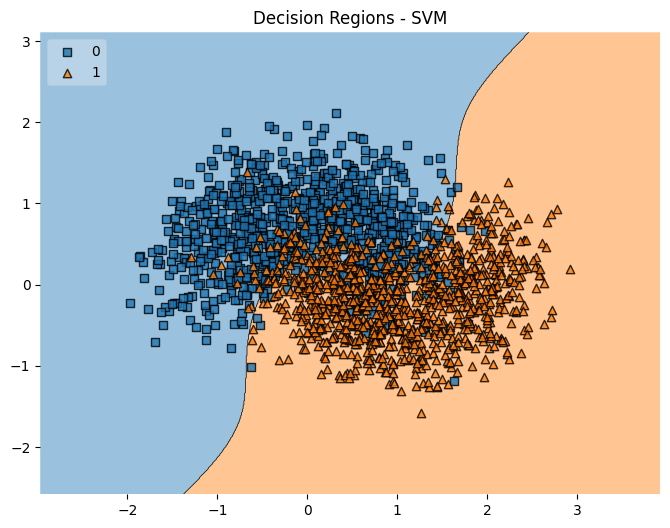

In [23]:

def evaluate_and_plot(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

    # Plot decision regions
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_test, y_test, clf=model, legend=2)
    plt.title(f"Decision Regions - {name}")
    plt.show()

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
evaluate_and_plot(log_reg, "Logistic Regression")

# SVM
svm = SVC(kernel='rbf', gamma='auto')
evaluate_and_plot(svm, "SVM")

#Voting Classifier

Voting Classifier
Accuracy: 0.8695, Precision: 0.8637, Recall: 0.8734, F1: 0.8685


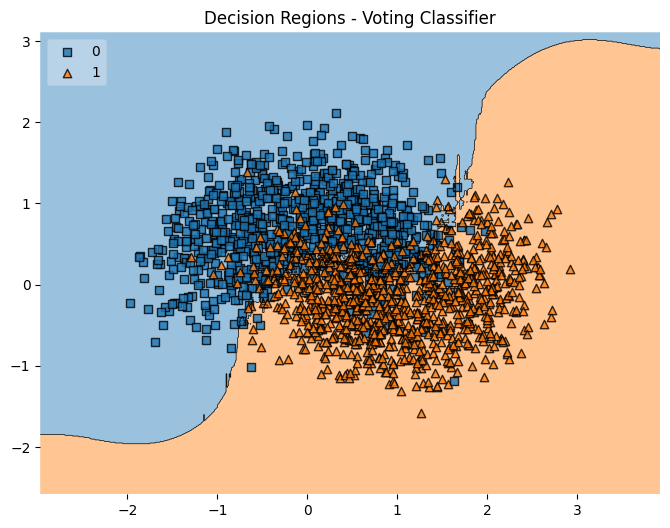

In [25]:

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('svm', SVC(kernel='rbf', gamma='auto', probability=True)),
        ('forest', RandomForestClassifier(n_estimators=100, random_state=42))
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Voting Classifier")
print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

# Plot decision regions
plt.figure(figsize=(8, 6))
plot_decision_regions(X_test, y_test, clf=voting_clf, legend=2)
plt.title("Decision Regions - Voting Classifier")
plt.show()

#Summary of the results



*   Best single model: SVM (87.05% accuracy, 86.98% F1).

*   Best ensemble: Voting Classifier (86.95% accuracy, 86.85% F1) – nearly matches SVM but more robust.

*  Best ensemble: Voting Classifier (86.95% accuracy, 86.85% F1) – nearly matches SVM but more robust.

* Random Forest: 50 trees (86.85%) > 100 trees (85.05%) – optimal around 50 trees.

* Decision Tree: Peaks at Depth 3 (86.3%), deeper trees overfit (Depth 10: 85.1%).

* Logistic Regression: Weakest (84.15% accuracy), struggles with non-linear data.


**Note:Tree visualizations are simplified (max_depth=2) for readability. To visualize the full tree, omit the max_depth parameter.**









